In [2]:
!pip install "zenml[server]" notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.6/525.6 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.

In [3]:
!rm -rf .zen
!zenml init


Initializing the ZenML global configuration version to 0.71.0
Creating database tables
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠸ Initializing ZenML repository at /content.
⠼ Initializing ZenML repository at /content.
⠴ Initializing ZenML repository at /content.
⠦ Initializing ZenML repository at /content.
⠧ Initializing ZenML repository at /content.
⠇ Initializing ZenML repository at /content.
⠏ Initializing ZenML repository at /content.
⠋ Initializing ZenML repository at /content.
⠙ Initializing ZenML repository at /content.
⠹ Initializing ZenML repository at /content.
⠸ Initializin

In [4]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def train_test() -> None:
    """Train and test a Scikit-learn SVC classifier on digits"""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )

    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")

train_test()


Test accuracy: 0.9583333333333334


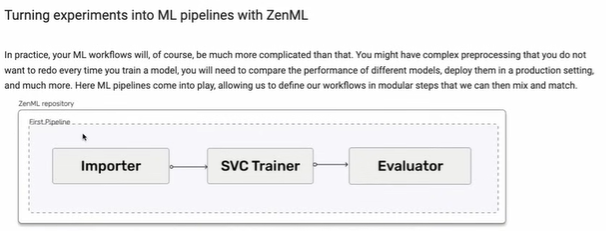

In [8]:
 from zenml import step
from typing_extensions import Annotated
import numpy as np
from typing import Tuple

@step
def importer() -> Tuple[
    Annotated[np.ndarray, "X_train"],
    Annotated[np.ndarray, "X_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"],
]:
    """Load the digits dataset as numpy arrays."""
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.2, shuffle=False
    )
    return X_train, X_test, y_train, y_test

@step
def svc_trainer(
    X_train: np.ndarray,
    y_train: np.ndarray,
) -> ClassifierMixin:
    """Train an sklearn SVC classifier."""
    model = SVC(gamma=0.001)
    model.fit(X_train, y_train)
    return model

@step
def evaluator(
    X_test: np.ndarray,
    y_test: np.ndarray,
    model: ClassifierMixin,
) -> float:
    """Calculate the test set accuracy of an sklearn model."""
    test_acc = model.score(X_test, y_test)
    print(f"Test accuracy: {test_acc}")
    return test_acc



In [9]:
from zenml import pipeline

@pipeline
def digits_pipeline():
  """ Links all the steps together in a pipeline"""
  X_train, X_test, y_train, y_test = importer()
  model = svc_trainer(X_train=X_train,y_train= y_train)
  evaluator (X_test=X_test,y_test= y_test,model = model)



In [24]:
digits_svc_pipeline =digits_pipeline()

Initiating a new run for the pipeline: digits_pipeline.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
You can visualize your pipeline runs in the ZenML Dashboard. In order to try it locally, please run zenml login --local.
Using cached version of step importer.
Using cached version of step svc_trainer.
Using cached version of step evaluator.
All steps of the pipeline run were cached.


In [20]:
!pip install ngrok
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.9 MB/s eta 0:00:00


In [22]:
!ngrok config add-authtoken 2glgIhLetq2ZnY4pjZmVmJbI8Vv_5Pm3rRnptYk92VwkX6xqs

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from zenml.environment import Environment


def start_zenml_dashboard(port=8237):
  if Environment.in_google_colab():
    from pyngrok import ngrok
    public_url = ngrok.connect(port)
    print(f"-------------{public_url}----------")
    !zenml up --blocking --port {port}

  else:
    !zenml up --port {port}

start_zenml_dashboard()

INFO:pyngrok.ngrok:Opening tunnel named: http-8237-b518c5e7-fcb5-41ae-bc38-43cc4afe2cb3


Opening tunnel named: http-8237-b518c5e7-fcb5-41ae-bc38-43cc4afe2cb3


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:28+0000 lvl=info msg="no configuration paths supplied"


t=2025-01-13T16:33:28+0000 lvl=info msg="no configuration paths supplied"


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:28+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


t=2025-01-13T16:33:28+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:28+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


t=2025-01-13T16:33:28+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:28+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


t=2025-01-13T16:33:28+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg="client session established" obj=tunnels.session


t=2025-01-13T16:33:29+0000 lvl=info msg="client session established" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg="tunnel session started" obj=tunnels.session


t=2025-01-13T16:33:29+0000 lvl=info msg="tunnel session started" obj=tunnels.session


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=c3e2084be25b8f51


t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=c3e2084be25b8f51


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=c3e2084be25b8f51 status=200 dur=1.00393ms


t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=c3e2084be25b8f51 status=200 dur=1.00393ms


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=a8c53b9212bfecb3


t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=a8c53b9212bfecb3


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=a8c53b9212bfecb3 status=200 dur=198.468µs


t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=a8c53b9212bfecb3 status=200 dur=198.468µs


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=9c649dce7203d3ae


t=2025-01-13T16:33:29+0000 lvl=info msg=start pg=/api/tunnels id=9c649dce7203d3ae


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-b518c5e7-fcb5-41ae-bc38-43cc4afe2cb3 addr=http://localhost:8237 url=https://02f2-35-185-105-246.ngrok-free.app


-------------NgrokTunnel: "https://02f2-35-185-105-246.ngrok-free.app" -> "http://localhost:8237"----------
t=2025-01-13T16:33:29+0000 lvl=info msg="started tunnel" obj=tunnels name=http-8237-b518c5e7-fcb5-41ae-bc38-43cc4afe2cb3 addr=http://localhost:8237 url=https://02f2-35-185-105-246.ngrok-free.app


INFO:pyngrok.process.ngrok:t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=9c649dce7203d3ae status=201 dur=45.466393ms


t=2025-01-13T16:33:29+0000 lvl=info msg=end pg=/api/tunnels id=9c649dce7203d3ae status=201 dur=45.466393ms
The `zenml up` command is deprecated and will be removed in a future release. Please use the `zenml 
login --local` command instead.
Calling `zenml login --local`...
The local ZenML dashboard is about to deploy in a blocking process.
Deploying a local daemon ZenML server.
Not writing the global configuration to disk in a ZenML server environment.
Initializing the ZenML global configuration version to 0.71.0
Not writing the global configuration to disk in a ZenML server environment.
Starting ZenML Server as blocking process... press CTRL+C once to stop it.
INFO:     Started server process [18005]
INFO:     Waiting for application startup.
Not writing the global configuration to disk in a ZenML server environment.
Not writing the global configuration to disk in a ZenML server environment.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8237 (Pre

INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:36+0000 lvl=info msg="join connections" obj=join id=3234431bccee l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:36+0000 lvl=info msg="join connections" obj=join id=3234431bccee l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET / HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9c8344fcdb51 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/index-FO-p0GU7.js HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9c8344fcdb51 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9824543e3da0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/index-DXvT1_Um.css HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9824543e3da0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=4036081f662b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=4036081f662b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8883971c0a6c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8883971c0a6c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8c26c08859b1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8c26c08859b1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6ae9971c75ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6ae9971c75ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=22ed24b003ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=22ed24b003ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6cc6c528fa7c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6cc6c528fa7c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=76c19e0bfcf1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=76c19e0bfcf1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9391a22c62d5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9391a22c62d5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f4ba0edf708e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f4ba0edf708e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2156398cc008 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2156398cc008 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d37c933cda58 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d37c933cda58 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=148a96cdc1c0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=148a96cdc1c0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8c4f34345979 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8c4f34345979 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2e3f79dc055f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2e3f79dc055f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d92415e08b0e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d92415e08b0e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d1d7692991d4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d1d7692991d4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1e1c154cbbcd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1e1c154cbbcd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3247237ef8ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3247237ef8ab l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c320b056fddb l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c320b056fddb l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=be189d7c98fb l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=be189d7c98fb l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=515368994ddc l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=515368994ddc l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6cdce3363f90 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6cdce3363f90 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ecb570cc3274 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ecb570cc3274 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cb2d4684ef3f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cb2d4684ef3f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=26de5f8bc1ea l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=26de5f8bc1ea l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d1125aa1ca5b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d1125aa1ca5b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d2dab76d35a3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d2dab76d35a3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d4a0a5c8603e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d4a0a5c8603e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b150925efc25 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b150925efc25 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f0ffec58a387 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f0ffec58a387 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9300e5f82aa6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9300e5f82aa6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9a41eb72aaa8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9a41eb72aaa8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cd146517fda6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cd146517fda6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=113120bfbdd0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=113120bfbdd0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6c9e0594bd82 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6c9e0594bd82 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2ead868208b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2ead868208b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=36356861cfbf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=36356861cfbf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92787af1e569 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92787af1e569 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b2625ed1f418 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b2625ed1f418 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5df8fa60997d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/%40radix-DeK6qiuw.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/%40reactflow-C26Olbza.css HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/%40react-router-B3Z5rLr2.js HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5df8fa60997d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=44c49e75ce3d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=44c49e75ce3d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6f39f844bb7d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6f39f844bb7d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c87710e6b4b3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c87710e6b4b3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d87234c77364 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d87234c77364 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cf3eb9b95bc4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cf3eb9b95bc4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=983d0ddb68f7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=983d0ddb68f7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=17e9bca42329 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=17e9bca42329 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7137ad4ac56c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7137ad4ac56c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e1c5034fb17e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e1c5034fb17e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=789946079d3a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=789946079d3a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=19e578964390 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/%40tanstack-DT5WLu9C.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-400-normal-Dc4VJyIJ.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/%40reactflow-D2Y7BWwz.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-vietnamese-400-normal-DMkecbls.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=19e578964390 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c430e72c38fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c430e72c38fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=942d31d8d19a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=942d31d8d19a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fa7a90e58ef9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fa7a90e58ef9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=516662ad363b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=516662ad363b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=72d1ebf6e315 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=72d1ebf6e315 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=18a3c4b8be4c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=18a3c4b8be4c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e4797bba799b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e4797bba799b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=da47f7ba1055 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=da47f7ba1055 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=975c60376666 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=975c60376666 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f52b062e3699 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f52b062e3699 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c1e51b9685c4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-ext-400-normal-Bput3-QP.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c1e51b9685c4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9a952ccdaa68 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9a952ccdaa68 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1cf6a124f73f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1cf6a124f73f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92fc14f0cff4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92fc14f0cff4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f7a2be2c927 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f7a2be2c927 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=28bc2ca64a38 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=28bc2ca64a38 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5c38ff9049ae l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5c38ff9049ae l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f2c236c28072 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f2c236c28072 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0c73db2e1d08 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0c73db2e1d08 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=833d5d6f385d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=833d5d6f385d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e3064965c582 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-400-normal-DxZsaF_h.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e3064965c582 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=88786845c07b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=88786845c07b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cc484be7b0df l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cc484be7b0df l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=422012da08ac l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=422012da08ac l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9caf584ecb25 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9caf584ecb25 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b27cbb6a768e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b27cbb6a768e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d681d1ca30e1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d681d1ca30e1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b84ada38ef51 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b84ada38ef51 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=22b340fd4a5a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=22b340fd4a5a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=119314a4d607 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-400-normal-BLGc9T1a.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-500-normal-D4Vwzodn.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=119314a4d607 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=759a3b45ac55 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=759a3b45ac55 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2472b9e9a1bd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2472b9e9a1bd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e714fbe4cbb7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e714fbe4cbb7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3adacc88e84b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3adacc88e84b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=03c723a24290 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=03c723a24290 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=70ebd3058d7a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=70ebd3058d7a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=705e3caee4f9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=705e3caee4f9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=17dfa8e5f958 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=17dfa8e5f958 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fbbce66e2d6f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fbbce66e2d6f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=23ba824dabe4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=23ba824dabe4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=37e27c19a30e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=37e27c19a30e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ec5bb4c0a444 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ec5bb4c0a444 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9c096f558470 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9c096f558470 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f3cdce50a6c1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f3cdce50a6c1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7bf548bb4124 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7bf548bb4124 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5b90727415b5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5b90727415b5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6a56b7752c1d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6a56b7752c1d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0a61bf6f754d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-600-normal-BGBWG807.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-500-normal-CeQXL5ds.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0a61bf6f754d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=57177e761bdd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=57177e761bdd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d8faf0407bc6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d8faf0407bc6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5d1c2397b6d0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5d1c2397b6d0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d38f13e1c518 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d38f13e1c518 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=579c2964a4d9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=579c2964a4d9 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=33d6b732a728 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=33d6b732a728 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b992c7bbcc83 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b992c7bbcc83 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b8ae9fc31014 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b8ae9fc31014 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=207cd92111c2 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=207cd92111c2 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ab009574c958 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-400-normal-BOOGhInR.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ab009574c958 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9d099fa27820 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=9d099fa27820 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=290fdb0de5fe l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=290fdb0de5fe l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fb27a09ce516 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fb27a09ce516 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=57d25fb5f300 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=57d25fb5f300 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f6e0ed57fdf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f6e0ed57fdf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8b4a2f57e051 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8b4a2f57e051 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=69239bc8b659 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=69239bc8b659 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fe9251fb6789 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=fe9251fb6789 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea6af7e870d1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-500-normal-D2bGa7uu.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea6af7e870d1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c5413fab1489 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=c5413fab1489 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0b49707c6c9f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0b49707c6c9f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b3221c1fa07d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b3221c1fa07d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3a6b02fd58b8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=3a6b02fd58b8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d60a996379dd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d60a996379dd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=999e0b64af60 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=999e0b64af60 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=437f79cffd4d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=437f79cffd4d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f5ef64b88c8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=7f5ef64b88c8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d625c181e13a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d625c181e13a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6415560a256c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-vietnamese-500-normal-DOriooB6.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-ext-500-normal-CIS2RHJS.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=6415560a256c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=186493288460 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=186493288460 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b370330514dd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b370330514dd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=37c051ea4d2e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=37c051ea4d2e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=dcdef3b297f1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=dcdef3b297f1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=af62abd714fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=af62abd714fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8ae8f85112ad l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8ae8f85112ad l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=dc55990220fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=dc55990220fa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=aa9ccd2f1abf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=aa9ccd2f1abf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f4d10f548694 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f4d10f548694 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b333740da463 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-500-normal-BShVwWPj.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b333740da463 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e3ddddbd0042 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e3ddddbd0042 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d0b25f6dfa57 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=d0b25f6dfa57 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e62c4cd0f3b2 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e62c4cd0f3b2 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=91b397bb6597 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=91b397bb6597 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1ad17280b5f0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1ad17280b5f0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=10eba7a6bc82 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=10eba7a6bc82 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1984cda11a6b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1984cda11a6b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=bbd1519aeedf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=bbd1519aeedf l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e2e1befc43a5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-ext-400-normal-hnt3BR84.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-600-normal-CaqZN2hq.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e2e1befc43a5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e06ca43da430 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=e06ca43da430 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b8dd964fc702 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=b8dd964fc702 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=a957053e4859 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=a957053e4859 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f38719c15ced l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=f38719c15ced l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea1131685dc8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea1131685dc8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=175910e14048 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=175910e14048 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ff94dc6bcc88 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ff94dc6bcc88 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5158b0340465 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5158b0340465 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2eb637b20244 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=2eb637b20244 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ec9edc1bdc70 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ec9edc1bdc70 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=930003d5fc2b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-400-normal-BPnxn4xp.woff HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=930003d5fc2b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8e633e6cbbb7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8e633e6cbbb7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cee5971ce9b0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=cee5971ce9b0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0926583e0901 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0926583e0901 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ef2b95745888 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ef2b95745888 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1a12eae636d6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1a12eae636d6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=775c4ee66c68 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=775c4ee66c68 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=af13d7f46f0c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=af13d7f46f0c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5a99766de873 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=5a99766de873 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1aa1c786711d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=1aa1c786711d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea4b8b844339 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-ext-500-normal-B6guLgqG.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-600-normal-D273HNI0.woff2 HTTP/1.1" 200 OK
t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ea4b8b844339 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92dfb21823d4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=92dfb21823d4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0ee70bf89ce5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0ee70bf89ce5 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0a8bd0845c6a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=0a8bd0845c6a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=4e7cdd3a1c84 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=4e7cdd3a1c84 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=a30495422559 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=a30495422559 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ad574276b524 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=ad574276b524 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=46cb6bf4b627 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=46cb6bf4b627 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=36885022e7df l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=36885022e7df l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8d597c2c85dc l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:37+0000 lvl=info msg="join connections" obj=join id=8d597c2c85dc l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-500-normal-CUiC4oBV.woff HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-ext-600-normal-Bt9VVOA-.woff HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-cyrillic-500-normal-DH2hs3aW.woff HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-vietnamese-400-normal-BUNmGMP1.woff HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/acp-DOsXjFc7.webp HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-ext-600-normal-Cnui8OiR.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-greek-ext-400-normal-DCpCPQOf.woff HTTP/1.1" 200 OK
INFO:     2c0f

INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=1639481dd92e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/link-external-b9AXw_sW.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/login-command-CkqxPtV3.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/CodeSnippet-DIonwetW.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/copy-C8XQA2Ug.js HTTP/1.1" 200 OK
t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=1639481dd92e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=d4a0fe1a75e7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=d4a0fe1a75e7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=521febc340a1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=521febc340a1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=db2ff999fc5c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=db2ff999fc5c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=5175e198cef0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=5175e198cef0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=3c107d6a9c8e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=3c107d6a9c8e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=a603b26a3c29 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=a603b26a3c29 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=02cda735d191 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:35:42+0000 lvl=info msg="join connections" obj=join id=02cda735d191 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/cloud-squares-DeRLMopf.svg HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-500-normal-D2bGa7uu.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/inter-latin-600-normal-D273HNI0.woff2 HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=e1290f318108 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=e1290f318108 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/page-DRYXdL5o.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=ebe690194b4a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/package-C6uypY4h.js HTTP/1.1" 200 OK
t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=ebe690194b4a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=ee447b07ad5e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/help-Cc9bBIJH.js HTTP/1.1" 200 OK
t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=ee447b07ad5e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=45d08664962a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=45d08664962a l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=cdb095f7dea3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=cdb095f7dea3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=66b1ca7c1842 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=66b1ca7c1842 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=a2143abea6c6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=a2143abea6c6 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=01bfa4d47750 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:07+0000 lvl=info msg="join connections" obj=join id=01bfa4d47750 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/Tick-COg4A-xo.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/plus-tf1V2hTJ.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/Helpbox-BfAfhKHw.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/check-DloQpStc.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/chevron-right-double-D7ojK9Co.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/chevron-down-6JyMkfjR.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:08+0000 lvl=info msg="join connections" obj=join id=20857c2b378e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:08+0000 lvl=info msg="join connections" obj=join id=20857c2b378e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:13+0000 lvl=info msg="join connections" obj=join id=f95f022fee3e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:13+0000 lvl=info msg="join connections" obj=join id=f95f022fee3e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:18+0000 lvl=info msg="join connections" obj=join id=7c0561b0ab97 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:18+0000 lvl=info msg="join connections" obj=join id=7c0561b0ab97 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:18+0000 lvl=info msg="join connections" obj=join id=92c3d795921d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:18+0000 lvl=info msg="join connections" obj=join id=92c3d795921d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/page-Ce4Hrjnr.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:19+0000 lvl=info msg="join connections" obj=join id=9dd426ebed8d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/code-browser-CUFUIHfp.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/ProviderIcon-BZpgPigN.js HTTP/1.1" 200 OK
t=2025-01-13T16:36:19+0000 lvl=info msg="join connections" obj=join id=9dd426ebed8d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:19+0000 lvl=info msg="join connections" obj=join id=8b5a3c8b61f7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:19+0000 lvl=info msg="join connections" obj=join id=8b5a3c8b61f7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/layout-BtHBmE4w.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/gcp-CFtm4BA7.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:22+0000 lvl=info msg="join connections" obj=join id=f4bde1c68471 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
t=2025-01-13T16:36:22+0000 lvl=info msg="join connections" obj=join id=f4bde1c68471 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:28+0000 lvl=info msg="join connections" obj=join id=7a142b627af0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:28+0000 lvl=info msg="join connections" obj=join id=7a142b627af0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:32+0000 lvl=info msg="join connections" obj=join id=a8c166cb9792 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK
t=2025-01-13T16:36:32+0000 lvl=info msg="join connections" obj=join id=a8c166cb9792 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:32+0000 lvl=info msg="join connections" obj=join id=c81e3a45bef8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/cloud-squares-DeRLMopf.svg HTTP/1.1" 200 OK
t=2025-01-13T16:36:32+0000 lvl=info msg="join connections" obj=join id=c81e3a45bef8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/page-Dk32IeZm.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=84c66440100b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=84c66440100b l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=992afbe2a110 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=992afbe2a110 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=d830ca0bac98 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=d830ca0bac98 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=d354b4dd7694 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=d354b4dd7694 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=ea714cf80e46 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/refresh-BjOeWlEq.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/SearchField-n-ILHnaP.js HTTP/1.1" 200 OK
t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=ea714cf80e46 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=c56cb17e72e0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=c56cb17e72e0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=6bd09db90c6c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=6bd09db90c6c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=1665a26cb123 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=1665a26cb123 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=a16869da2620 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=a16869da2620 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=f3a769890df8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=f3a769890df8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=4181759c969e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=4181759c969e l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=a68f7d0bb0aa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=a68f7d0bb0aa l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=8de7cfb764b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=8de7cfb764b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=3ca570a2e0a8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=3ca570a2e0a8 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=94182d3fb068 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=94182d3fb068 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=1da0fbbc55ba l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=1da0fbbc55ba l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=436432b713c7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=436432b713c7 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=0a875ce3da96 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:35+0000 lvl=info msg="join connections" obj=join id=0a875ce3da96 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/CopyButton-B6wGAhQv.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/url-BLwMbzES.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/dots-horizontal-otGBOSDJ.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/ExecutionStatus-ibAdY-dG.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/trash-arLUMWMS.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/RunSelector-DgRGaAc6.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/DeleteAlertDialog-D2ELtM2W.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/AlertDialogDropdownItem-BHd71pVS.js HTTP/1.1" 200 OK
I

INFO:pyngrok.process.ngrok:t=2025-01-13T16:36:47+0000 lvl=info msg="join connections" obj=join id=8b3e14c4f9c1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:36:47+0000 lvl=info msg="join connections" obj=join id=8b3e14c4f9c1 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=08362c23589c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=08362c23589c l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=17c422eedb76 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=17c422eedb76 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=33f36943f803 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=33f36943f803 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=139abe208941 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=139abe208941 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


INFO:pyngrok.process.ngrok:t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=9a79f6249272 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239


t=2025-01-13T16:39:03+0000 lvl=info msg="join connections" obj=join id=9a79f6249272 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:55239
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=ab2688462530 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=ab2688462530 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


INFO:pyngrok.process.ngrok:t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=c766db51fdc3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=c766db51fdc3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


INFO:pyngrok.process.ngrok:t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=ee99dc67554d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=ee99dc67554d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


INFO:pyngrok.process.ngrok:t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=4da466a9501f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=4da466a9501f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


INFO:pyngrok.process.ngrok:t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=6f9e42bd671f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563


t=2025-01-13T16:43:54+0000 lvl=info msg="join connections" obj=join id=6f9e42bd671f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:56563
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=ea626230b93d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=ea626230b93d l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=28aaf0db6b34 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=28aaf0db6b34 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=a0446f970523 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=a0446f970523 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=7aff9f3495f0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=7aff9f3495f0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=52a8b8645118 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:45:44+0000 lvl=info msg="join connections" obj=join id=52a8b8645118 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/settings HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/info HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/onboarding_state HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/current-user HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/pipelines?page=1&sort_by=desc%3Alatest_run HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:14+0000 lvl=info msg="join connections" obj=join id=370cc1c0b880 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:14+0000 lvl=info msg="join connections" obj=join id=370cc1c0b880 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/templates-1S_8WeSK.webp HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/pipelines?page=1&sort_by=desc%3Alatest_run HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/page-zaMqB_ao.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /api/v1/runs?pipeline_name=digits_pipeline&page=1&sort_by=desc%3Aupdated HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/page-B6XU7yYT.js HTTP/1.1" 200 OK


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=7d41c71812b3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/NestedCollapsible-DpgmEFKw.js HTTP/1.1" 200 OK
t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=7d41c71812b3 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=e1573eef0841 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=e1573eef0841 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=2341ab195850 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=2341ab195850 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=2276dff92ccd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=2276dff92ccd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=d9d7e4f3d0ce l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=d9d7e4f3d0ce l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=ddf8b699ed30 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=ddf8b699ed30 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=72fabc3d8f8f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=72fabc3d8f8f l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=c0d497fabba0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=c0d497fabba0 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=c37e72b61bfd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=c37e72b61bfd l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=8bf06b4c2e80 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=8bf06b4c2e80 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=fcc9599af0b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/code-snippets-CqONne41.js HTTP/1.1" 200 OK
t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=fcc9599af0b4 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


INFO:pyngrok.process.ngrok:t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=e6f32fdaa965 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026


t=2025-01-13T16:46:26+0000 lvl=info msg="join connections" obj=join id=e6f32fdaa965 l=127.0.0.1:8237 r=[2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f]:57026
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/stack-detail-query-XfZBiBP2.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/CollapsibleCard-CDnC97pB.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/Error-B8uUfTpL.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/logs-WMSM52RF.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/index-I3bKUGUj.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/tick-circle-BEX_Tp4v.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/dates-3pMLCNrD.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb:102d:5ea6:7e41:3a5f:0 - "GET /assets/EmptyState-BzdlCwp3.js HTTP/1.1" 200 OK
INFO:     2c0f:fc88:5:8feb: